In [11]:
#!pip install Scipy

In [8]:
#!git clone https://github.com/taehojo/data-ch20.git


Cloning into 'data-ch20'...


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,   #  정규화
                  horizontal_flip=True,              # 수평으로 뒤집기
                  width_shift_range=0.1,             # 수평이동
                  height_shift_range=0.1,            # 수직이동
                  fill_mode='nearest')               # 빈 공간 채우는 방법

train_genarator = train_datagen.flow_from_directory(
                './data-ch20/train',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)  # 테스트셋은 정규화만
test_generator = test_datagen.flow_from_directory(
                './data-ch20/test',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape = (150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.0002), metrics = ['accuracy'])

In [13]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_genarator, epochs=100, validation_data= test_generator, validation_steps= 10, callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 3s 76ms/step - loss: 0.6931 - accuracy: 0.5437 - val_loss: 0.6864 - val_accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 2s 73ms/step - loss: 0.6900 - accuracy: 0.5625 - val_loss: 0.6826 - val_accuracy: 0.6200
Epoch 3/100
32/32 [==============================] - 2s 71ms/step - loss: 0.6823 - accuracy: 0.5813 - val_loss: 0.6665 - val_accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 2s 75ms/step - loss: 0.6854 - accuracy: 0.5125 - val_loss: 0.6352 - val_accuracy: 0.6200
Epoch 5/100
32/32 [==============================] - 2s 74ms/step - loss: 0.6585 - accuracy: 0.6438 - val_loss: 0.7044 - val_accuracy: 0.4200
Epoch 6/100
32/32 [==============================] - 2s 69ms/step - loss: 0.6383 - accuracy: 0.6750 - val_loss: 0.6261 - val_accuracy: 0.6800
Epoch 7/100
32/32 [==============================] - 2s 72ms/step - loss: 0.5571 - accuracy: 0.7375 - val_loss: 0.6845 - val_accuracy: 0.5200
Epoch 

In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

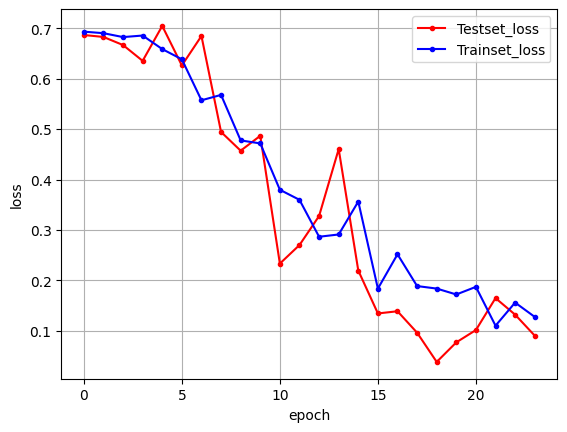

In [15]:
plt.plot(x_len, y_vloss, marker = '.', c ='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c ='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
## 2. 전이 학습으로 모델 성능 극대화

from tensorflow.keras.applications import VGG16

In [2]:
trans_model = VGG16(weights='imagenet', include_top = False, input_shape=(150,150,3))
trans_model.trainable = False

trans_model.summary()

58889256/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [5]:
# 학습할 모델 생성
model = Sequential()
model.add(trans_model)
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.0002), metrics = ['accuracy'])

In [9]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_genarator, epochs=100, validation_data= test_generator, validation_steps= 10, callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 12s 343ms/step - loss: 0.6780 - accuracy: 0.5875 - val_loss: 0.5579 - val_accuracy: 0.6600
Epoch 2/100
32/32 [==============================] - 11s 345ms/step - loss: 0.5484 - accuracy: 0.7000 - val_loss: 0.4363 - val_accuracy: 0.9200
Epoch 3/100
32/32 [==============================] - 11s 353ms/step - loss: 0.4326 - accuracy: 0.8188 - val_loss: 0.4278 - val_accuracy: 0.8200
Epoch 4/100
32/32 [==============================] - 11s 356ms/step - loss: 0.4532 - accuracy: 0.7937 - val_loss: 0.3801 - val_accuracy: 0.8400
Epoch 5/100
32/32 [==============================] - 11s 356ms/step - loss: 0.3621 - accuracy: 0.8375 - val_loss: 0.3044 - val_accuracy: 0.9600
Epoch 6/100
32/32 [==============================] - 12s 362ms/step - loss: 0.3219 - accuracy: 0.8938 - val_loss: 0.3022 - val_accuracy: 0.9600
Epoch 7/100
32/32 [==============================] - 12s 367ms/step - loss: 0.2601 - accuracy: 0.9312 - val_loss: 0.2475 - val_accuracy:

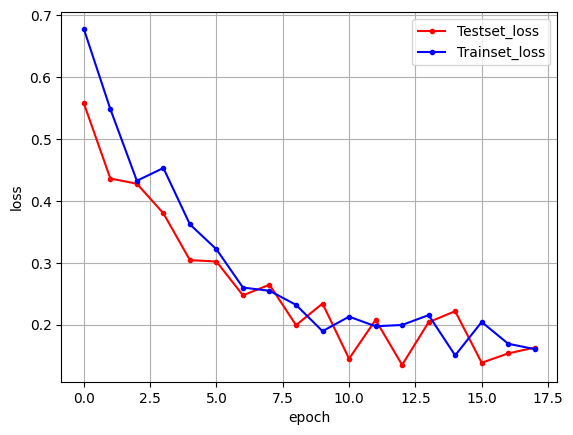

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c ='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c ='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
from tensorflow.keras.applications import InceptionV3

In [12]:
trans_model = InceptionV3(weights='imagenet', include_top = False, input_shape=(150,150,3))

trans_model.trainable = False

trans_model.summary()

87910968/87910968 [==============================] - 8s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [13]:
# 학습할 모델 생성
model = Sequential()
model.add(trans_model)
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,982,561
Trainable params: 1,179,777
Non-trainable params: 21,802,784
_________________________________________________________________


In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.0002), metrics = ['accuracy'])

In [15]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_genarator, epochs=100, validation_data= test_generator, validation_steps= 10, callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 9s 153ms/step - loss: 0.8956 - accuracy: 0.7063 - val_loss: 0.3656 - val_accuracy: 0.8800
Epoch 2/100
32/32 [==============================] - 4s 120ms/step - loss: 0.3171 - accuracy: 0.8813 - val_loss: 0.2655 - val_accuracy: 0.9200
Epoch 3/100
32/32 [==============================] - 4s 114ms/step - loss: 0.2268 - accuracy: 0.9062 - val_loss: 0.1845 - val_accuracy: 0.9000
Epoch 4/100
32/32 [==============================] - 4s 115ms/step - loss: 0.3033 - accuracy: 0.9375 - val_loss: 0.2209 - val_accuracy: 0.9200
Epoch 5/100
32/32 [==============================] - 4s 113ms/step - loss: 0.2019 - accuracy: 0.9375 - val_loss: 0.2593 - val_accuracy: 0.9000
Epoch 6/100
32/32 [==============================] - 4s 112ms/step - loss: 0.1961 - accuracy: 0.9250 - val_loss: 0.1201 - val_accuracy: 0.9600
Epoch 7/100
32/32 [==============================] - 4s 111ms/step - loss: 0.2438 - accuracy: 0.9250 - val_loss: 0.1418 - val_accuracy: 0.9400

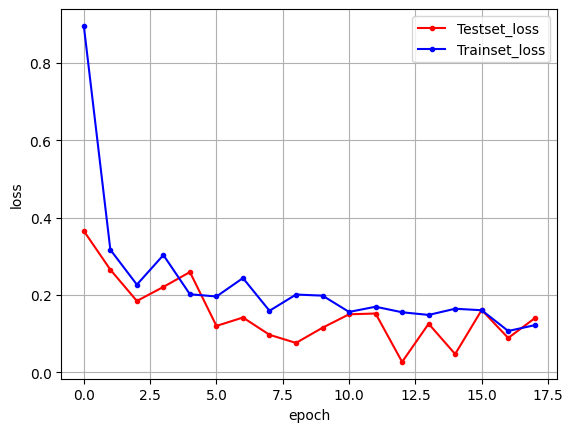

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c ='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c ='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()